<a href="https://colab.research.google.com/github/JoaoViniciusFerraz/Mini-projeto-roof-imoveis-dnc/blob/main/Roof_Im%C3%B3veis_code_Jo%C3%A3o_Vin%C3%ADcius_Ferraz_de_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas usadas no projeto

In [20]:
#Se necessário instalar as bibliotecas, remova as #
#!pip install pandas
#!pip install seaborn
#!pip install numpy
#!pip install matplotlib
#!pip install DateTime
#!pip install uszipcode

import pandas as pd
from datetime import date, datetime
from uszipcode import SearchEngine, SimpleZipcode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Leitura do dataset em csv

In [21]:
#Se necessário, alterar o caminho para o csv
df = pd.read_csv("/content/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Entendendo os dados;

In [22]:
#Dados estatisticos
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
#tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Limpeza e modificação de dados;

In [24]:
#modificando o tipo da coluna
df["date"] = df['date'].astype('datetime64[ns]')
df['bedrooms'] = df['bedrooms'].astype(float).round()
df['bathrooms'] = df['bathrooms'].astype(float).round()
df['floors'] = df['floors'].astype(float).round()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
#Removendo os imóveis com quartos e banheiros nulos 
df = df.loc[(df['bedrooms'] != 0) & (df['bathrooms'] != 0)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4.0,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2.0,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3.0,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Adicionando a coluna cidades e classificação de preços;

In [26]:
#Localizando os imóveis pelas cidades
search = SearchEngine()
def zco(x):
  city = search.by_zipcode(x).major_city
  return city if city else 'None'

df['city'] = df['zipcode'].apply(zco)
df

Exception ignored in: <function SearchEngine.__del__ at 0x7fe3e0c2ff70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3.0,2.0,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2.0,1.0,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.0,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4.0,2.0,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2.0,1.0,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3.0,2.0,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [27]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159300e+04,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.00000,21593.000000,21593.000000
mean,4.580300e+09,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,1.534803,0.007549,0.234335,3.409855,7.658176,1788.744315,291.734127,1971.003936,84.480433,98077.943547,47.560096,-122.21397,1986.702126,12759.564211
std,2.876833e+09,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.554383,0.086557,0.766454,0.650576,1.173058,827.701596,442.694837,29.373286,401.857011,53.513681,0.138548,0.14073,685.263461,27276.789824
min,1.000102e+06,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.32800,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.23100,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.12500,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


In [28]:
#Classificando os preços dos imóveis, dividindo se é maior ou menor que a média de preço
df['mean_price'] = 'standard'
df.loc[df['price'] > 540000, 'mean_price'] = 'high_level'
df.loc[df['price'] < 540000, 'mean_price'] = 'low_level'
df

<ipython-input-28-2b228afd5780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_price'] = 'standard'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,mean_price
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,low_level
1,6414100192,2014-12-09,538000.0,3.0,2.0,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,low_level
2,5631500400,2015-02-25,180000.0,2.0,1.0,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,low_level
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,high_level
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,low_level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.0,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle,low_level
21609,6600060120,2015-02-23,400000.0,4.0,2.0,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle,low_level
21610,1523300141,2014-06-23,402101.0,2.0,1.0,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle,low_level
21611,291310100,2015-01-16,400000.0,3.0,2.0,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah,low_level


Filtrando e ordenando os imóveis

In [29]:
#Seprando os dados com as colunas que tenho como relevante no momento
df2 = df[['id', 'date', 'price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot','condition', 'yr_built','mean_price','yr_renovated', 'city']]
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180,5650,3,1955,low_level,0,Seattle
1,6414100192,2014-12-09,538000.0,3.0,2.0,2570,7242,3,1951,low_level,1991,Seattle
2,5631500400,2015-02-25,180000.0,2.0,1.0,770,10000,3,1933,low_level,0,Kenmore
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960,5000,5,1965,high_level,0,Seattle
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680,8080,3,1987,low_level,0,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.0,1530,1131,3,2009,low_level,0,Seattle
21609,6600060120,2015-02-23,400000.0,4.0,2.0,2310,5813,3,2014,low_level,0,Seattle
21610,1523300141,2014-06-23,402101.0,2.0,1.0,1020,1350,3,2009,low_level,0,Seattle
21611,291310100,2015-01-16,400000.0,3.0,2.0,1600,2388,3,2004,low_level,0,Issaquah


In [30]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,yr_renovated
count,2.159300e+04,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000
mean,4.580300e+09,5.402590e+05,3.373408,2.060158,2080.478442,1.510119e+04,3.409855,1971.003936,84.480433
std,2.876833e+09,3.671431e+05,0.926140,0.753983,918.076377,4.141625e+04,0.650576,29.373286,401.857011
min,1.000102e+06,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,3.000000,1951.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,3.000000,1975.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068700e+04,4.000000,1997.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,5.000000,2015.000000,2015.000000


In [31]:
#Filtrando os dados
#Preço dos imóveis entre 322000 e 645000
#Condições de imóvel entre 3 e 4
#Ano de construção a partir de 1971
df3 = df2.loc[(df2['price'] >= 322000) & (df2['price'] <= 645000) & (df2['condition'] == 4) & (df2['yr_built'] >= 1971)]
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city
13,6054650070,2014-10-07,400000.0,3.0,2.0,1370,9680,4,1977,low_level,0,Sammamish
24,3814700200,2014-11-20,329000.0,3.0,2.0,2450,6500,4,1985,low_level,0,Kent
71,1049000060,2015-01-05,325000.0,3.0,2.0,1260,5612,4,1972,low_level,0,Kirkland
105,1328310370,2015-04-02,375000.0,3.0,2.0,2340,10005,4,1978,low_level,0,Renton
164,2617300160,2014-08-12,420000.0,3.0,2.0,2020,38332,4,1975,low_level,0,Issaquah
...,...,...,...,...,...,...,...,...,...,...,...,...
19464,5152960330,2014-06-10,480000.0,5.0,2.0,2732,9500,4,1975,low_level,0,Federal Way
19544,2558670110,2014-08-29,419000.0,3.0,2.0,1700,7650,4,1975,low_level,0,Kirkland
19846,1332700200,2015-04-26,359000.0,3.0,2.0,1950,1968,4,1979,low_level,0,Renton
19931,8073900070,2014-05-22,408000.0,3.0,2.0,1950,7221,4,2006,low_level,0,Seattle


Calculando o preço do pé quadrado por imóvel

In [32]:
#Preço do pé quadrado do imóvel
df3['value_ft2'] = (df3['price'] / df2['sqft_lot']).round(2)
df3

<ipython-input-32-faacd173c89d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['value_ft2'] = (df3['price'] / df2['sqft_lot']).round(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city,value_ft2
13,6054650070,2014-10-07,400000.0,3.0,2.0,1370,9680,4,1977,low_level,0,Sammamish,41.32
24,3814700200,2014-11-20,329000.0,3.0,2.0,2450,6500,4,1985,low_level,0,Kent,50.62
71,1049000060,2015-01-05,325000.0,3.0,2.0,1260,5612,4,1972,low_level,0,Kirkland,57.91
105,1328310370,2015-04-02,375000.0,3.0,2.0,2340,10005,4,1978,low_level,0,Renton,37.48
164,2617300160,2014-08-12,420000.0,3.0,2.0,2020,38332,4,1975,low_level,0,Issaquah,10.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19464,5152960330,2014-06-10,480000.0,5.0,2.0,2732,9500,4,1975,low_level,0,Federal Way,50.53
19544,2558670110,2014-08-29,419000.0,3.0,2.0,1700,7650,4,1975,low_level,0,Kirkland,54.77
19846,1332700200,2015-04-26,359000.0,3.0,2.0,1950,1968,4,1979,low_level,0,Renton,182.42
19931,8073900070,2014-05-22,408000.0,3.0,2.0,1950,7221,4,2006,low_level,0,Seattle,56.50


In [33]:
#Extraindo o valor médio do pé quadrado de cada cidade.

df3.grouped = df3.groupby(by='city').mean('value_ft2')
df3.grouped = df3.grouped[['value_ft2']].round(2)
df3.grouped

<ipython-input-33-089cbc773fd3>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.grouped = df3.groupby(by='city').mean('value_ft2')


,value_ft2
city,
Auburn,17.35
Bellevue,85.00
Black Diamond,12.00
Bothell,53.67
Carnation,22.49
Duvall,20.41
Enumclaw,11.82
Fall City,22.43
Federal Way,38.44


filtrando pelo preço médio do ft2 de cada cidade 

In [34]:
#Filtrando cada imovel que esteja abaixo do preço médio da sua cidade.

df3 = df3.drop(df3[(df3.city=='Auburn') & (df3.value_ft2 > 40.52)].index)
df3 = df3.drop(df3[(df3.city=='Bellevue') & (df3.value_ft2 > 89.35)].index)
df3 = df3.drop(df3[(df3.city=='Black Diamond') & (df3.value_ft2 > 15.85)].index)
df3 = df3.drop(df3[(df3.city=='Bothell') & (df3.value_ft2 > 63.54)].index)
df3 = df3.drop(df3[(df3.city=='Carnation') & (df3.value_ft2 > 15.44)].index)
df3 = df3.drop(df3[(df3.city=='Duvall') & (df3.value_ft2 > 47.65)].index)
df3 = df3.drop(df3[(df3.city=='Enumclaw') & (df3.value_ft2 > 15.35)].index)
df3 = df3.drop(df3[(df3.city=='Fall City') & (df3.value_ft2 > 16.48)].index)
df3 = df3.drop(df3[(df3.city=='Federal Way') & (df3.value_ft2 > 43.05)].index)
df3 = df3.drop(df3[(df3.city=='Issaquah') & (df3.value_ft2 > 132.12)].index)
df3 = df3.drop(df3[(df3.city=='Kenmore') & (df3.value_ft2 > 65.79)].index)
df3 = df3.drop(df3[(df3.city=='Kent') & (df3.value_ft2 > 43.71)].index)
df3 = df3.drop(df3[(df3.city=='Kirkland') & (df3.value_ft2 > 70.92)].index)
df3 = df3.drop(df3[(df3.city=='Maple Valley') & (df3.value_ft2 > 56.20)].index)
df3 = df3.drop(df3[(df3.city=='Mercer Island') & (df3.value_ft2 > 46.68)].index)
df3 = df3.drop(df3[(df3.city=='North Bend') & (df3.value_ft2 > 37.04)].index)
df3 = df3.drop(df3[(df3.city=='Redmond') & (df3.value_ft2 > 78.32)].index)
df3 = df3.drop(df3[(df3.city=='Renton') & (df3.value_ft2 > 62.63)].index)
df3 = df3.drop(df3[(df3.city=='Sammamish') & (df3.value_ft2 > 57.02)].index)
df3 = df3.drop(df3[(df3.city=='Seattle') & (df3.value_ft2 > 238.23)].index)
df3 = df3.drop(df3[(df3.city=='Snoqualmie') & (df3.value_ft2 > 89.75)].index)
df3 = df3.drop(df3[(df3.city=='Vashon') & (df3.value_ft2 > 14.51)].index)
df3 = df3.drop(df3[(df3.city=='Woodinville') & (df3.value_ft2 > 41.28)].index)
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city,value_ft2
13,6054650070,2014-10-07,400000.0,3.0,2.0,1370,9680,4,1977,low_level,0,Sammamish,41.32
71,1049000060,2015-01-05,325000.0,3.0,2.0,1260,5612,4,1972,low_level,0,Kirkland,57.91
105,1328310370,2015-04-02,375000.0,3.0,2.0,2340,10005,4,1978,low_level,0,Renton,37.48
164,2617300160,2014-08-12,420000.0,3.0,2.0,2020,38332,4,1975,low_level,0,Issaquah,10.96
284,5634500392,2015-04-10,330000.0,3.0,3.0,2420,13959,4,1988,low_level,0,Kenmore,23.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19410,7524950900,2015-02-10,620000.0,3.0,2.0,2010,7495,4,1979,high_level,0,Issaquah,82.72
19420,3578401210,2014-12-18,557000.0,4.0,2.0,2660,11315,4,1983,high_level,0,Sammamish,49.23
19443,3345700215,2014-06-20,595000.0,3.0,3.0,3290,22649,4,1993,high_level,0,Renton,26.27
19544,2558670110,2014-08-29,419000.0,3.0,2.0,1700,7650,4,1975,low_level,0,Kirkland,54.77


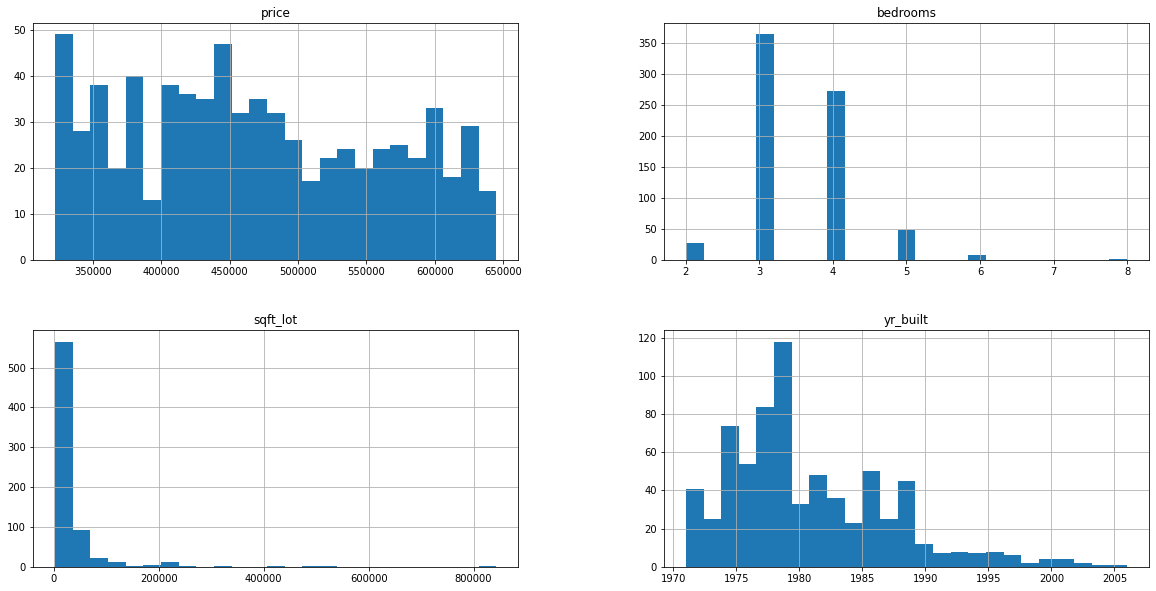

In [35]:
#Gráficos de visualização de dados gerais 
df4 = df3[['price', 'bedrooms', 'sqft_lot', 'yr_built' ]]
df4.hist(bins=25,figsize=(20,10))
plt.show()

In [36]:
#Restringindo a pesquisa pelos imóveis mais novos, com mais quartos e mais banheiros. 
#Com preço na amplitude interquartil e valor por pé quadrado abaixo da média.
df3 = df3.loc[df3['yr_built'] > 1998]
df3.sort_values(by=['yr_built', 'bedrooms', 'bathrooms'],ascending=False).head()




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city,value_ft2
19931,8073900070,2014-05-22,408000.0,3.0,2.0,1950,7221,4,2006,low_level,0,Seattle,56.50
8221,4307350730,2014-11-13,506000.0,5.0,4.0,3880,8370,4,2004,low_level,0,Renton,60.45
9778,2009000830,2014-07-08,455000.0,4.0,4.0,3440,6000,4,2002,low_level,0,Seattle,75.83
15857,8961950050,2015-03-20,409000.0,4.0,3.0,3230,12651,4,2002,low_level,0,Auburn,32.33
14106,4008400035,2014-10-15,600000.0,5.0,3.0,4410,58157,4,2001,high_level,0,Renton,10.32


Filtrando os imóveis não aconselhavieis para investimento

In [37]:
#Filtrando os imóveis com péssimas condições, mais velhos e como critério de desempate, quantidade de quartos e banheiros no imóvel.
df4 = df2.sort_values(by=['yr_built', 'bedrooms', 'bathrooms', 'condition'],ascending=True)
df4 = df4.loc[df4['condition'] <=1]
df4['value_ft2'] = df4['price'] / df4['sqft_lot']
df4.round(2).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,mean_price,yr_renovated,city,value_ft2
1442,5694000710,2014-11-07,352950.0,3.0,1.0,1760,3000,1,1900,low_level,0,Seattle,117.65
14987,9187200095,2014-12-02,432500.0,6.0,2.0,3080,5500,1,1900,low_level,0,Seattle,78.64
16942,5015001680,2014-06-11,427000.0,4.0,1.0,1860,4736,1,1901,low_level,0,Seattle,90.16
18332,9272202260,2014-09-24,130000.0,3.0,1.0,1200,7000,1,1908,low_level,0,Seattle,18.57
1734,913000340,2015-01-02,252000.0,1.0,1.0,680,1638,1,1910,low_level,1992,Seattle,153.85
